# **NFL Big Data Bowl 2024**

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time

In [2]:
# load data
games = pd.read_csv('games.csv')
plays = pd.read_csv('plays.csv')
tackles = pd.read_csv('tackles.csv')
week1 = pd.read_csv('tracking_week_1.csv')
week2 = pd.read_csv('tracking_week_2.csv')
week3 = pd.read_csv('tracking_week_3.csv')
week4 = pd.read_csv('tracking_week_4.csv')
week5 = pd.read_csv('tracking_week_5.csv')
week6 = pd.read_csv('tracking_week_6.csv')
week7 = pd.read_csv('tracking_week_7.csv')
week8 = pd.read_csv('tracking_week_8.csv')
week9 = pd.read_csv('tracking_week_9.csv')

players = pd.read_csv('players.csv')

In [3]:
all_tracking = pd.concat([week1,week2,week3,week4,week5,week6,week7,week8,week9])
#all_tracking = week1.copy()

del week1

del week2
del week3
del week4
del week5
del week6
del week7
del week8
del week9


In [4]:
all_tracking.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


In [5]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [6]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [7]:
tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [8]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


### Make Filtered Dataframes

In [9]:
# dataframe with only plays with tackles
tackle_play_df = tackles[tackles['tackle']==1][['gameId','playId','nflId']]
tackle_play_df = tackle_play_df.add_prefix("tackle_")
tackle_plays = all_tracking.merge(tackle_play_df, left_on = ['gameId','playId'], right_on = ['tackle_gameId','tackle_playId'])
tackle_plays.drop(columns = ['tackle_gameId','tackle_playId'], inplace = True)

In [10]:
# get df with only the frames at the point of time with tackles
tackle_frames = tackle_plays[tackle_plays['event'] == 'tackle']

In [11]:
# get dataframe with positions at the beginings of plays
start_frames = all_tracking[all_tracking['frameId'] == 1]

In [12]:
start_frames.shape

(287112, 17)

In [13]:
tackle_frames.shape

(186623, 18)

## Make Player Movement Visualizations

In [14]:
# add prefixes to differentiate positions
track_tackle_pos = tackle_frames.add_prefix("end_")
track_start_pos = start_frames.add_prefix("start_")

In [15]:
track_start_pos.shape

(287112, 17)

In [16]:
track_tackle_pos.shape

(186623, 18)

In [17]:
# combine start and finish data
track_start_finish = track_start_pos.merge(track_tackle_pos, 
                                            left_on = ['start_gameId','start_playId','start_nflId','start_displayName'],
                                           right_on = ['end_gameId','end_playId','end_nflId','end_displayName'])

In [18]:
# calculate total distance
track_start_finish['distance']  = np.sqrt((track_start_finish['start_x'] - track_start_finish['end_x'])**2 +
                                    (track_start_finish['start_y'] - track_start_finish['end_y'])**2)

In [19]:
# calculate change in positions
track_start_finish['delta_x'] = track_start_finish['start_x'] - track_start_finish['end_x']
track_start_finish['delta_y'] = track_start_finish['start_y'] - track_start_finish['end_y']

In [20]:
# make a function to create heat maps
def make_player_travel_hist(player_name = "All Players", df = track_start_finish, title = "Movement Distribution",
                           bins = 20, gamma = .2, cmap = 'viridis'):
    player_name = player_name
    num_bins = 5
    player_df = df[df['start_displayName'] == player_name]
    
    if player_name == "All Players":
        player_df = df.copy()
    
    fig, ax = plt.subplots()
    gamma = gamma
    
    # set x and y ranges
    max_x = max(player_df['delta_x'])
    max_y = max(player_df['delta_y'])
    y_range = (-max_y, max_y)
    x_range = (-max_x, max_x)

    plt.hist2d(player_df['delta_x'], player_df['delta_y'], bins= bins, range = [x_range, y_range],
               norm=mcolors.PowerNorm(gamma), cmap = cmap)

    plt.title(player_name + " " + title)
    plt.show()

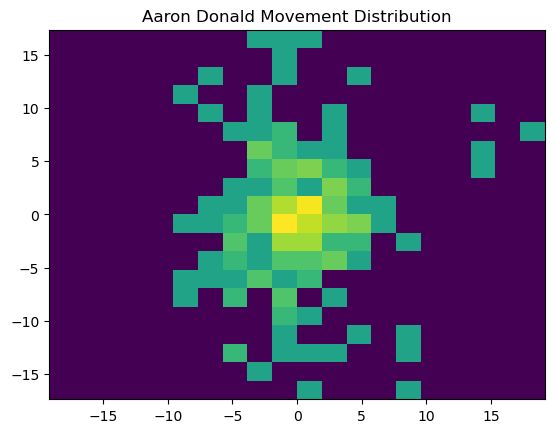

In [21]:
# run function
make_player_travel_hist("Aaron Donald")

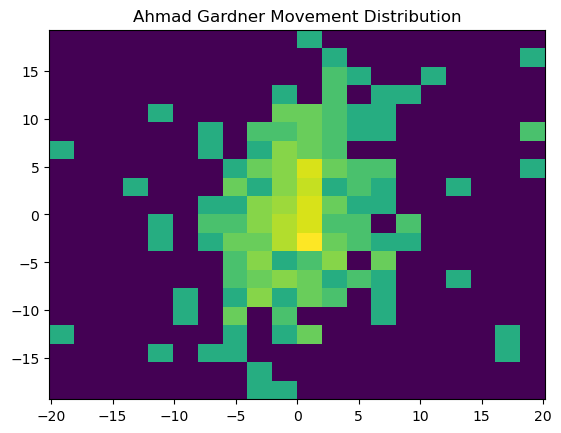

In [22]:
# run function
make_player_travel_hist("Ahmad Gardner")

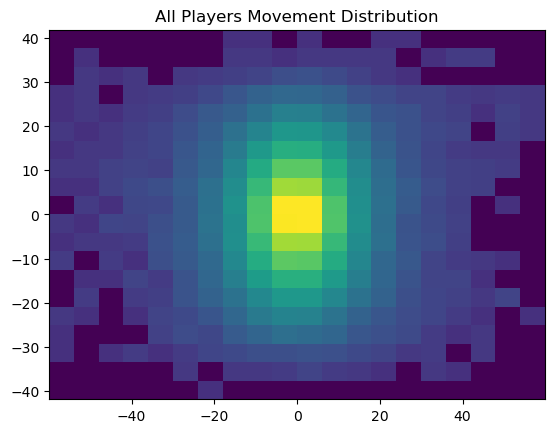

In [23]:
# all ball carriers
make_player_travel_hist()

## Make Tackle Involvment Visualization

*Define Tackle Involvments*: Within 1 yard of ballcarier at tackle.

#### Find all frames with tackle involvements

In [24]:
# get the info on the ball carrier
ball_carriers = plays[['gameId','playId','ballCarrierId']]

In [25]:
# get the ball carrier positions at time of tackle
ball_carrier_tackle_frame = tackle_frames.merge(ball_carriers, left_on = ['nflId','gameId','playId'], right_on = ['ballCarrierId','gameId','playId'])
ball_carrier_tackle_frame = ball_carrier_tackle_frame[['gameId','playId','ballCarrierId','tackle_nflId','x','y','s','a','dis','o','dir', 'club']]
ball_carrier_info_frames = ball_carrier_tackle_frame.add_prefix("ball_carrier_")

In [26]:
# merge ball carrier info with tackle info
carrier_def_tackle_frames = track_tackle_pos.merge(ball_carrier_info_frames, right_on = ['ball_carrier_gameId','ball_carrier_playId'],
                                              left_on = ['end_gameId','end_playId'])
# calculate distance to the ball carrier
carrier_def_tackle_frames['dist_to_carrier'] = np.sqrt((carrier_def_tackle_frames['end_x'] - carrier_def_tackle_frames['ball_carrier_x'])**2 +
                                             (carrier_def_tackle_frames['end_y'] - carrier_def_tackle_frames['ball_carrier_y'])**2)
# take only the players within a yard
player_involve_frames = carrier_def_tackle_frames[carrier_def_tackle_frames['dist_to_carrier'] <= 1]

In [27]:
# get only defensive players
player_involve_frames['same_team'] = player_involve_frames['end_club'] == player_involve_frames['ball_carrier_club']
def_involve_frames = player_involve_frames[player_involve_frames['same_team'] == False]
def_involve_frames = def_involve_frames.reset_index(drop = True)

/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/1673356165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_involve_frames['same_team'] = player_involve_frames['end_club'] == player_involve_frames['ball_carrier_club']


In [28]:
# get the start frame position
track_tackle_start_finish = def_involve_frames.merge(track_start_pos, left_on = ['end_gameId','end_playId','end_nflId'],
                                        right_on = ['start_gameId','start_playId','start_nflId'])
# get change in x and y
track_tackle_start_finish['delta_x'] = track_tackle_start_finish['end_x'] - track_tackle_start_finish['start_x']
track_tackle_start_finish['delta_y'] = track_tackle_start_finish['end_y'] - track_tackle_start_finish['start_y']

In [29]:
# make a function to get a visual of tackle involvements
def make_player_tackle_hist(player_name = "All Players", bins = 20, gamma = .2, cmap = 'inferno', 
                            df = track_tackle_start_finish):
    # run helper function with tackle involvement data
    make_player_travel_hist(player_name = player_name, df = df,
                            title = "Tackle Involvement Distribution",
                            bins = bins, gamma = gamma, cmap = cmap)

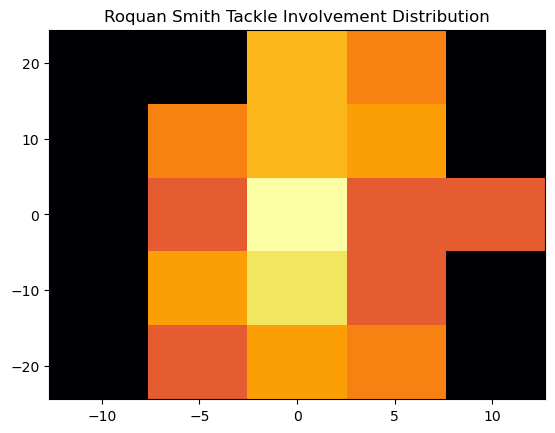

In [30]:
make_player_tackle_hist(player_name = "Roquan Smith", bins = 5, gamma = .2)

In [31]:
#make_player_tackle_hist(player_name = "Ahmad Gardner", bins = 5)

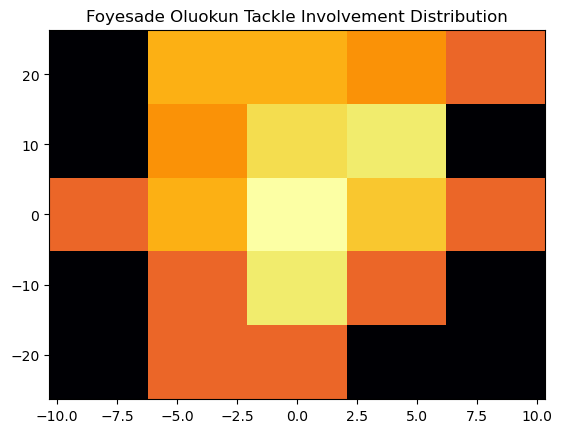

In [32]:
make_player_tackle_hist(player_name = 'Foyesade Oluokun', bins = 5)

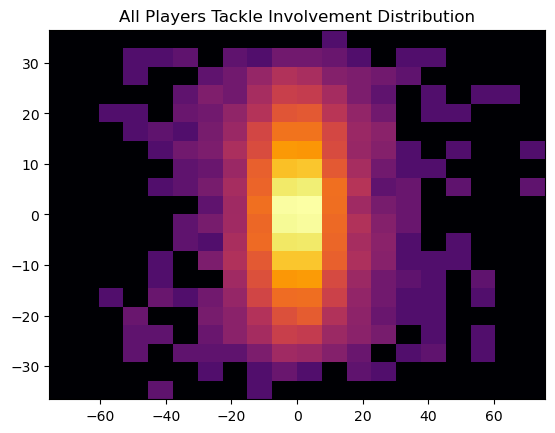

In [33]:
make_player_tackle_hist()

## Calculate Player Movement Means by Position

### Merge Player Position Info

In [34]:
info_track_tackle_start_finish = players.merge(track_tackle_start_finish, left_on = "nflId", right_on = "end_nflId")
info_track_tackle_start_finish.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,end_gameId,end_playId,end_nflId,...,start_x,start_y,start_s,start_a,start_dis,start_o,start_dir,start_event,delta_x,delta_y
0,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022091107,469,33131.0,...,91.81,26.13,0.02,0.03,0.00,47.57,119.10,NaN,-0.34,-1.15
1,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022091107,868,33131.0,...,98.51,33.51,2.75,1.30,0.28,286.22,318.96,NaN,-23.20,16.61
2,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022091107,1803,33131.0,...,78.78,30.24,0.09,0.19,0.01,38.77,202.63,NaN,3.22,11.90
3,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022091107,2530,33131.0,...,78.39,20.90,0.00,0.00,0.00,51.54,240.02,NaN,0.41,7.67
4,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022091800,1188,33131.0,...,40.40,32.13,0.01,0.01,0.01,283.92,168.12,NaN,2.04,-0.35


### Make Position tackle distribution Visualization

In [35]:
# make a function to get a visual of tackle involvements
def make_position_tackle_hist(pos, bins = 20, gamma = .2, cmap = 'inferno'):
    # define position df
    position_df = info_track_tackle_start_finish[info_track_tackle_start_finish['position']==pos]
    # use helper function
    make_player_tackle_hist(player_name = "All Players", bins = 20, gamma = .2, cmap = 'inferno', df = position_df)

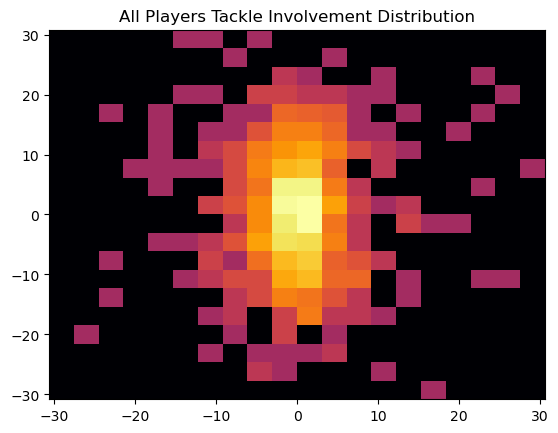

In [36]:
make_position_tackle_hist('DE')

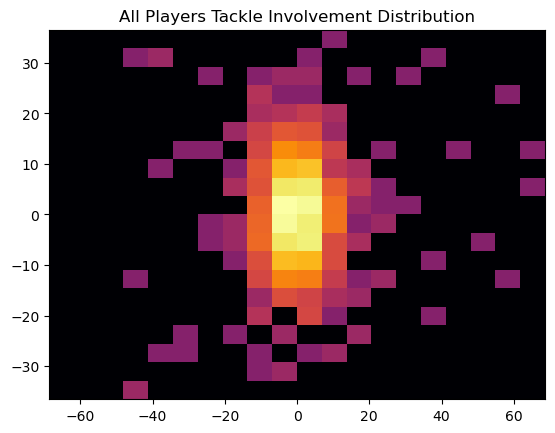

In [37]:
make_position_tackle_hist('CB')

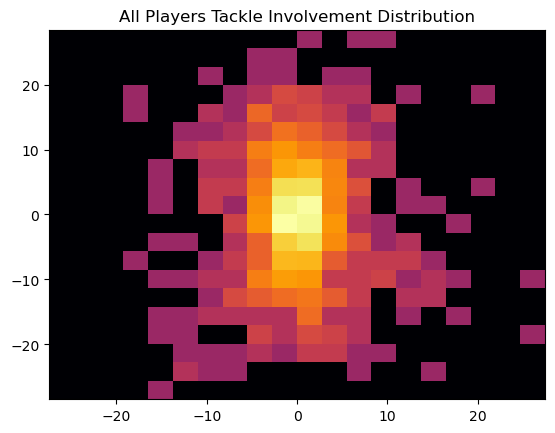

In [38]:
make_position_tackle_hist('DT')

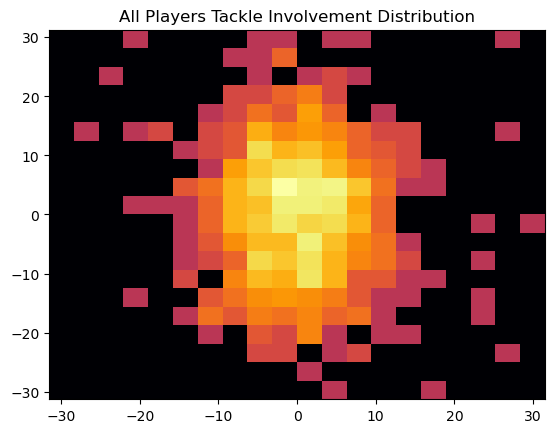

In [39]:
make_position_tackle_hist('SS')

### Calculate the Means by Position

In [40]:
position_list = [set(players['position'])]

## Get all Tackle Opportunities

*tackle opportunity:* within 1 yard of the ballcarrier at any point in the play

In [41]:
# get the info on the ball carrier
ball_carriers = plays[['gameId','playId','ballCarrierId']]

In [42]:
# get the ball carrier positions at all frames
ball_carrier_frames = all_tracking.merge(ball_carriers, left_on = ['nflId','gameId','playId'], right_on = ['ballCarrierId','gameId','playId'])
ball_carrier_frames = ball_carrier_frames[['gameId','playId','ballCarrierId', 'frameId','nflId','x','y','s','a','dis','o','dir','club']]
ball_carrier_frames = ball_carrier_frames.add_prefix("ball_carrier_")

In [43]:
ball_carrier_frames

,ball_carrier_gameId,ball_carrier_playId,ball_carrier_ballCarrierId,ball_carrier_frameId,ball_carrier_nflId,ball_carrier_x,ball_carrier_y,ball_carrier_s,ball_carrier_a,ball_carrier_dis,ball_carrier_o,ball_carrier_dir,ball_carrier_club
0,2022090800,56,42489,1,42489.0,80.60,38.29,6.23,0.90,0.62,140.05,189.38,BUF
1,2022090800,56,42489,2,42489.0,80.48,37.68,6.24,1.27,0.62,134.22,191.08,BUF
2,2022090800,56,42489,3,42489.0,80.34,37.09,5.98,2.48,0.60,127.16,194.40,BUF
3,2022090800,56,42489,4,42489.0,80.19,36.53,5.67,3.37,0.58,120.72,196.97,BUF
4,2022090800,56,42489,5,42489.0,80.01,36.00,5.43,3.65,0.56,118.07,199.54,BUF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
529874,2022110700,3787,43525,40,43525.0,26.24,19.72,1.60,4.04,0.18,103.01,121.39,NO
529875,2022110700,3787,43525,41,43525.0,26.34,19.66,1.04,4.24,0.12,108.55,120.45,NO
529876,2022110700,3787,43525,42,43525.0,26.40,19.62,0.54,4.13,0.07,112.22,125.47,NO
529877,2022110700,3787,43525,43,43525.0,26.42,19.58,0.25,3.65,0.05,113.85,171.35,NO


In [44]:
# narrow the tracking columns
all_tracking_players = all_tracking[['gameId','playId','frameId','nflId','club','x','y','s','a','o','dir']]
# get football position
football_frames = all_tracking_players[all_tracking_players['club']== "football"]
football_frames = football_frames.add_prefix('football_')
# drop the football rows
all_tracking_players = all_tracking_players.dropna(axis = 0)

In [45]:
import dask.dataframe as dd

In [46]:
# try using dask dfs to make this merge
start_time = time.time()

# merge all tracking frames with football frames to see who's close to the ball
ddf1 = dd.from_pandas(all_tracking_players, npartitions=100)
ddf2 = dd.from_pandas(football_frames, npartitions=100)

merged_ddf = dd.merge(ddf1, ddf2, left_on=['gameId','playId', 'frameId'], 
                      right_on = ['football_gameId','football_playId','football_frameId'], how='inner')
merged_df = merged_ddf.compute()

end_time = time.time()
print(f"Elapsed time: {end_time - start_time} seconds")

Elapsed time: 19.751682996749878 seconds


In [47]:
player_ball_frames = merged_df

# calculate distance to the ball carrier
player_ball_frames['dist_to_carrier'] = np.sqrt((player_ball_frames['x'] - player_ball_frames['football_x'])**2 +
                                             (player_ball_frames['y'] - player_ball_frames['football_y'])**2)
# take only the players within a yard
player_opportunity_frames = player_ball_frames[player_ball_frames['dist_to_carrier'] <= 1]

In [48]:
# add ball carrier info
player_ball_carrier_opp_frames = player_opportunity_frames.merge(ball_carrier_frames, left_on = ['gameId','playId','frameId'],
                                         right_on = ['ball_carrier_gameId','ball_carrier_playId','ball_carrier_frameId'])

In [49]:
# get the rows of the dataframe where the ball carrier has the ball
player_ball_carrier_opp_frames['carrier_w_ball'] = (player_ball_carrier_opp_frames['football_a'] > player_ball_carrier_opp_frames['ball_carrier_a'] - 1) &(player_ball_carrier_opp_frames['football_a'] < player_ball_carrier_opp_frames['ball_carrier_a'] + 1)

player_ball_carrier_w_ball_frames = player_ball_carrier_opp_frames[player_ball_carrier_opp_frames['carrier_w_ball']]

In [50]:
# get only defensive players
player_ball_carrier_w_ball_frames['same_team'] = player_ball_carrier_w_ball_frames['club'] == player_ball_carrier_w_ball_frames['ball_carrier_club']
def_player_opp_frames = player_ball_carrier_w_ball_frames[player_ball_carrier_w_ball_frames['same_team'] == False]
def_player_opp_frames = def_player_opp_frames.reset_index(drop = True)

/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/2724066593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_ball_carrier_w_ball_frames['same_team'] = player_ball_carrier_w_ball_frames['club'] == player_ball_carrier_w_ball_frames['ball_carrier_club']


Assumption that we're taking: only one opportunity per play, the point where the defensive player is closest to the ballcarrier

In [51]:
# get only the frames where the defensive player is closest to the ballcarrier
def_player_opp_frames = def_player_opp_frames.sort_values(by = ['dist_to_carrier'])
# remove duplicates based on gameId, playId, and nflId
def_player_opp_frames = def_player_opp_frames.drop_duplicates(subset = ['gameId','playId','nflId'], keep = "first")

In [52]:
# get ball carrier end points
# get all end frames (dropna removes all non-event rows)
end_frames = all_tracking.dropna(axis = 0).sort_values(by = 'frameId',ascending = False)
# merge with ball_carrier information
ball_carrier_end_frames = end_frames.merge(ball_carriers, left_on = ['gameId','playId','nflId'], right_on = ['gameId','playId','ballCarrierId'])
ball_carrier_end_frames = ball_carrier_end_frames.drop_duplicates(subset = ['gameId','playId'], keep = "first")
ball_carrier_end_frames = ball_carrier_end_frames.add_prefix("carrier_end_")

In [53]:
# merge with prior defensive player information
def_player_bc_start_end_frames =  def_player_opp_frames.merge(ball_carrier_end_frames, 
                                            left_on = ['gameId','playId','ball_carrier_nflId'],
                                            right_on = ['carrier_end_gameId','carrier_end_playId','carrier_end_nflId'])

In [54]:
# function for checking whether a tackle opportunity was successful (the ball carrier didn't gain additional yards)
def calc_successful_stop(row):
    if row['ball_carrier_dir'] > 180:
        if row['carrier_end_x'] >= (row['ball_carrier_x'] - 1):
            return True
        return False
    if row['carrier_end_x'] <= (row['ball_carrier_x'] + 1):
        return True
    return False

In [55]:
def_player_bc_start_end_frames['successful_stop'] = def_player_bc_start_end_frames.apply(calc_successful_stop, axis = 1)

In [56]:
def_player_bc_start_end_frames[def_player_bc_start_end_frames['successful_stop'] == False]

,gameId,playId,frameId,nflId,club,x,y,s,a,o,...,carrier_end_x,carrier_end_y,carrier_end_s,carrier_end_a,carrier_end_dis,carrier_end_o,carrier_end_dir,carrier_end_event,carrier_end_ballCarrierId,successful_stop
7,2022092501,3119,55,35470.0,HOU,23.46,15.39,1.50,1.18,318.30,...,26.09,14.83,0.28,0.77,0.03,180.29,89.17,tackle,53646,False
8,2022092501,3119,74,53599.0,HOU,25.29,14.51,0.33,3.09,295.20,...,26.09,14.83,0.28,0.77,0.03,180.29,89.17,tackle,53646,False
10,2022092501,3119,58,46669.0,HOU,24.06,15.04,0.51,1.06,296.66,...,26.09,14.83,0.28,0.77,0.03,180.29,89.17,tackle,53646,False
20,2022091809,3501,27,47996.0,DAL,101.60,21.31,3.68,1.80,82.18,...,104.84,15.98,3.63,4.88,0.39,256.65,157.77,tackle,44860,False
21,2022091809,3501,34,53504.0,DAL,103.43,19.26,5.22,3.68,359.31,...,104.84,15.98,3.63,4.88,0.39,256.65,157.77,tackle,44860,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26538,2022103000,3042,20,46175.0,DEN,35.59,36.66,4.14,3.46,184.21,...,37.46,35.44,1.03,1.83,0.11,68.96,64.85,tackle,53454,False
26541,2022101602,2457,7,53602.0,GB,90.58,24.52,0.09,0.21,271.05,...,110.28,49.70,6.26,2.82,0.63,101.47,95.38,touchdown,46279,False
26542,2022091106,154,58,53465.0,MIA,72.54,2.29,7.26,4.37,127.96,...,75.44,0.32,8.70,1.18,0.90,66.19,119.50,out_of_bounds,53549,False
26543,2022091806,2390,14,44837.0,NE,45.67,11.52,4.37,4.46,180.82,...,43.42,10.12,2.88,2.88,0.30,290.12,234.77,tackle,47849,False


In [72]:
# calculate raw successful tackle % overall
numeric_cols = def_player_bc_start_end_frames.select_dtypes(include=np.number).columns.tolist()
stop_rate = def_player_bc_start_end_frames[numeric_cols].groupby(by = 'nflId').mean()#.reset_index()[['nflId','successful_stop']]
stop_chanses_count = def_player_bc_start_end_frames.groupby(by = ['nflId']).count().reset_index()[['nflId', 'playId']]
stop_chanses_count['play_count'] = stop_chanses_count['playId']
stop_chanses_count = stop_chanses_count.drop(columns = ['playId'])
stop_rate = stop_rate.merge(stop_chanses_count, on = 'nflId')

In [73]:
# get the start frame position
tackle_important_frames = def_player_bc_start_end_frames.merge(track_start_pos, left_on = ['gameId','playId','nflId'],
                                        right_on = ['start_gameId','start_playId','start_nflId'])
# calculate deltas

# get change in x and y from start to opportunity
tackle_important_frames['delta_x_start_opp'] = tackle_important_frames['x'] - tackle_important_frames['start_x']
tackle_important_frames['delta_y_start_opp'] = tackle_important_frames['y'] - tackle_important_frames['start_y']

# get change in x and y for ballcarrier opportunity to finish
tackle_important_frames['delta_x_bc_opp_finish'] = tackle_important_frames['carrier_end_x'] - tackle_important_frames['ball_carrier_x']
tackle_important_frames['delta_x_bc_opp_finish'] = tackle_important_frames['carrier_end_y'] - tackle_important_frames['ball_carrier_y']


In [265]:
# break down by square yardage

# bin the delta x from -120 to maximum of 120
x_bins = [i for i in range(-120, 121, 3)]
tackle_important_frames['delta_x_start_opp_bins'] = pd.cut(tackle_important_frames['delta_x_start_opp'], bins=x_bins)


# bin the delta y from -53 to maximum of 54
y_bins = [i for i in range(-54, 55, 3)]
tackle_important_frames['delta_y_start_opp_bins'] = pd.cut(tackle_important_frames['delta_y_start_opp'], bins=y_bins)

In [266]:
tackle_important_frames

,gameId,playId,frameId,nflId,club,x,y,s,a,o,...,start_a,start_dis,start_o,start_dir,start_event,delta_x_start_opp,delta_y_start_opp,delta_x_bc_opp_finish,delta_x_start_opp_bins,delta_y_start_opp_bins
0,2022101600,664,48,46127.0,ATL,30.85,25.87,1.31,0.81,211.26,...,0.47,0.02,255.54,331.55,NaN,-0.33,-2.15,-0.07,"(-3, 0]","(-3, 0]"
1,2022101600,664,54,53577.0,ATL,31.16,25.84,0.60,1.83,279.85,...,0.16,0.01,280.35,359.56,NaN,2.37,0.44,-0.10,"(0, 3]","(0, 3]"
2,2022101600,664,60,46091.0,ATL,29.96,26.33,0.66,2.17,183.48,...,0.00,0.00,293.31,330.42,NaN,-3.77,1.20,0.01,"(-6, -3]","(0, 3]"
3,2022101600,664,60,42480.0,ATL,29.53,26.05,0.56,1.67,186.24,...,0.04,0.01,256.34,317.04,NaN,0.59,3.46,0.01,"(0, 3]","(3, 6]"
4,2022102307,3101,47,53438.0,DEN,84.79,42.07,0.23,1.55,167.71,...,0.36,0.01,240.11,201.16,NaN,-3.34,7.66,0.98,"(-6, -3]","(6, 9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26541,2022101602,2457,7,53602.0,GB,90.58,24.52,0.09,0.21,271.05,...,0.03,0.01,274.42,283.74,NaN,-0.03,-0.02,33.58,"(-3, 0]","(-3, 0]"
26542,2022091106,154,58,53465.0,MIA,72.54,2.29,7.26,4.37,127.96,...,0.20,0.05,253.52,331.72,NaN,-10.62,-22.50,-1.30,"(-12, -9]","(-24, -21]"
26543,2022091806,2390,14,44837.0,NE,45.67,11.52,4.37,4.46,180.82,...,1.10,0.58,139.79,154.00,pass_arrived,2.07,-6.02,-1.31,"(0, 3]","(-9, -6]"
26544,2022102311,881,25,38707.0,MIA,69.15,52.85,3.08,2.11,12.05,...,0.56,0.61,22.90,347.50,NaN,-5.09,11.00,0.35,"(-6, -3]","(9, 12]"


In [267]:
# group by x and y bins
numeric_cols = tackle_important_frames.select_dtypes(include=np.number).columns.tolist()
cols = numeric_cols + ['delta_x_start_opp_bins','delta_y_start_opp_bins', 'successful_stop']
stop_rate_by_coords = tackle_important_frames[cols].groupby(by = ['delta_x_start_opp_bins', 'delta_y_start_opp_bins']).mean()
stop_rate_by_coords = stop_rate_by_coords.reset_index()[['delta_x_start_opp_bins', 'delta_y_start_opp_bins',  'successful_stop']]#.dropna(axis = 0)

In [268]:
# sort values
stop_rate_by_coords = stop_rate_by_coords.sort_values(by = ['delta_y_start_opp_bins'], ascending = False).sort_values(by = ['delta_x_start_opp_bins'], ascending = False)

In [269]:
# make a heatmap of stopage rates
pivot_df = stop_rate_by_coords.pivot_table(values='successful_stop', index='delta_y_start_opp_bins',
                                           columns='delta_x_start_opp_bins', aggfunc='mean')

In [270]:
pivot_df = pivot_df.fillna(0)

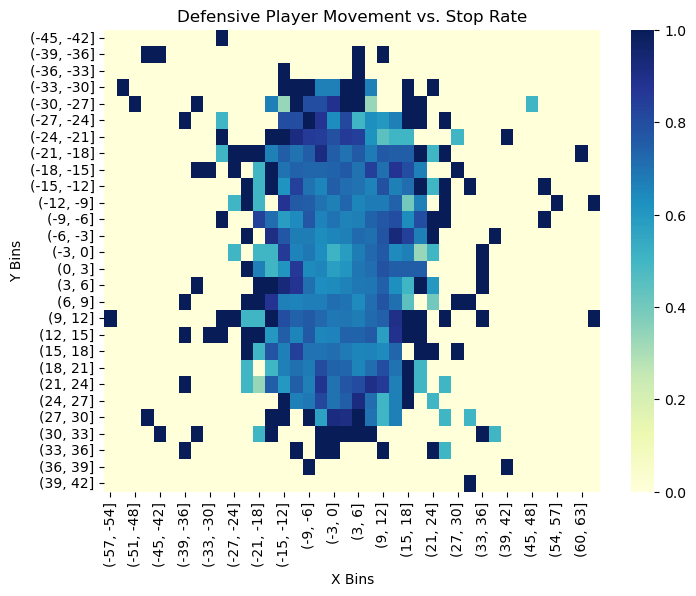

In [271]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='YlGnBu', fmt='g')
plt.title('Defensive Player Movement vs. Stop Rate')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()

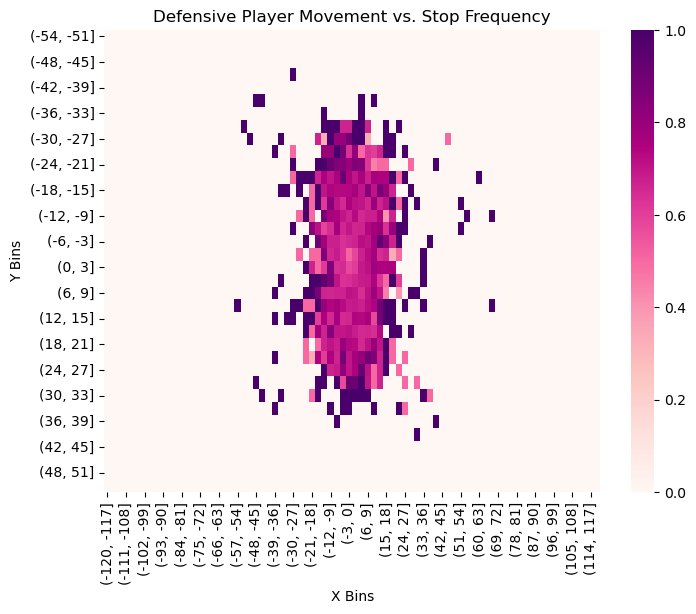

In [272]:
# make a heatmap of stopage frequency
pivot_df = stop_rate_by_coords.pivot_table(values='successful_stop', index='delta_y_start_opp_bins',
                                           columns='delta_x_start_opp_bins', aggfunc='sum')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('Defensive Player Movement vs. Stop Frequency')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()

In [89]:
pivot_df

delta_x_start_opp_bins,"(-120, -119]","(-119, -118]","(-118, -117]","(-117, -116]","(-116, -115]","(-115, -114]","(-114, -113]","(-113, -112]","(-112, -111]","(-111, -110]",...,"(110, 111]","(111, 112]","(112, 113]","(113, 114]","(114, 115]","(115, 116]","(116, 117]","(117, 118]","(118, 119]","(119, 120]"
delta_y_start_opp_bins,,,,,,,,,,,,,,,,,,,,,
"(-53, -52]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(-52, -51]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(-51, -50]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(-50, -49]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(-49, -48]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(49, 50]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(50, 51]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(51, 52]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Options:
- Look at square yardage covered
- Look at yardage and stop rate seperately
- Look at stop opportunity * stop rate:
    For a play that peaks ___ yards away in x direction and _____ away in y direction, player has a ___ % creating an opportunity to get a stop. Given that they make an opportunity, they have a ____ % chance of actually making the stop

## New Idea: Tackle Opportunities Created/Siezed

Look at stop opportunity * stop rate:
   - For a play that peaks ___ yards away in x direction and _____ away in y direction, player has a ___ % chance of creating an opportunity to get a stop. Given that they make an opportunity, they have a ____ % chance of actually making the stop

*First:* For each defensive player, find the closest that the ballcarrier gets to the defender intial point

In [90]:
# merge the start frames with all ball carrier frames
ball_carrier_closest = ball_carrier_frames.add_prefix('close_')
start_and_ball_carrier_frames = track_start_pos.merge(ball_carrier_closest, left_on = ['start_gameId','start_playId'],
                         right_on = ['close_ball_carrier_gameId','close_ball_carrier_playId'])

In [91]:
start_and_ball_carrier_frames

,start_gameId,start_playId,start_nflId,start_displayName,start_frameId,start_time,start_jerseyNumber,start_club,start_playDirection,start_x,...,close_ball_carrier_frameId,close_ball_carrier_nflId,close_ball_carrier_x,close_ball_carrier_y,close_ball_carrier_s,close_ball_carrier_a,close_ball_carrier_dis,close_ball_carrier_o,close_ball_carrier_dir,close_ball_carrier_club
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,...,1,42489.0,80.60,38.29,6.23,0.90,0.62,140.05,189.38,BUF
1,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,...,2,42489.0,80.48,37.68,6.24,1.27,0.62,134.22,191.08,BUF
2,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,...,3,42489.0,80.34,37.09,5.98,2.48,0.60,127.16,194.40,BUF
3,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,...,4,42489.0,80.19,36.53,5.67,3.37,0.58,120.72,196.97,BUF
4,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,...,5,42489.0,80.01,36.00,5.43,3.65,0.56,118.07,199.54,BUF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187212,2022110700,3787,NaN,football,1,2022-11-07 23:06:45.299999,NaN,football,right,20.629999,...,40,43525.0,26.24,19.72,1.60,4.04,0.18,103.01,121.39,NO
12187213,2022110700,3787,NaN,football,1,2022-11-07 23:06:45.299999,NaN,football,right,20.629999,...,41,43525.0,26.34,19.66,1.04,4.24,0.12,108.55,120.45,NO
12187214,2022110700,3787,NaN,football,1,2022-11-07 23:06:45.299999,NaN,football,right,20.629999,...,42,43525.0,26.40,19.62,0.54,4.13,0.07,112.22,125.47,NO
12187215,2022110700,3787,NaN,football,1,2022-11-07 23:06:45.299999,NaN,football,right,20.629999,...,43,43525.0,26.42,19.58,0.25,3.65,0.05,113.85,171.35,NO


In [92]:
# helper function to calculate distance
def calculate_distance(row):
    return np.sqrt((row['close_ball_carrier_x'] - row['start_x'])**2 + (row['close_ball_carrier_y'] - row['start_y'])**2)

# calculate distance from start to ball carrier position
start_and_ball_carrier_frames['bc_dist_to_start'] = start_and_ball_carrier_frames.apply(calculate_distance, axis=1)

In [93]:
# take only the frame where ball carrier is closest to the defender starting position
start_and_ball_carrier_frames = start_and_ball_carrier_frames.sort_values(by = ['bc_dist_to_start'])
start_and_ball_carrier_frames = start_and_ball_carrier_frames.drop_duplicates(subset = ['start_gameId','start_playId','start_nflId'],
                                                                              keep = "first")
start_and_ball_carrier_frames.reset_index(drop = True, inplace = True)

In [94]:
start_and_ball_carrier_frames

,start_gameId,start_playId,start_nflId,start_displayName,start_frameId,start_time,start_jerseyNumber,start_club,start_playDirection,start_x,...,close_ball_carrier_nflId,close_ball_carrier_x,close_ball_carrier_y,close_ball_carrier_s,close_ball_carrier_a,close_ball_carrier_dis,close_ball_carrier_o,close_ball_carrier_dir,close_ball_carrier_club,bc_dist_to_start
0,2022103008,215,47836.0,Miles Sanders,1,2022-10-30 13:07:27.799999,26.0,PHI,right,50.61,...,47836.0,50.61,23.54,0.00,0.00,0.00,86.51,252.00,PHI,0.000000
1,2022100903,2512,52733.0,James Robinson,1,2022-10-09 15:00:54.500000,25.0,JAX,right,11.70,...,52733.0,11.70,23.63,0.02,0.02,0.00,90.42,138.86,JAX,0.000000
2,2022102303,3040,52425.0,CeeDee Lamb,1,2022-10-23 15:25:35.299999,88.0,DAL,right,80.25,...,52425.0,80.25,25.37,3.42,1.01,0.35,271.37,44.97,DAL,0.000000
3,2022100903,2469,54572.0,Dameon Pierce,1,2022-10-09 14:57:34.400000,31.0,HOU,left,61.28,...,54572.0,61.28,38.89,6.00,1.62,0.61,42.63,346.59,HOU,0.000000
4,2022101601,180,53549.0,Rhamondre Stevenson,1,2022-10-16 13:07:00.200000,38.0,NE,right,58.98,...,53549.0,58.98,29.47,0.00,0.00,0.00,78.43,107.87,NE,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287104,2022092900,2598,40023.0,Terron Armstead,1,2022-09-29 22:28:03.700000,72.0,MIA,left,84.62,...,43454.0,21.50,29.23,7.99,1.99,0.81,23.90,304.66,MIA,63.465160
287105,2022092900,2598,45226.0,Josh Tupou,1,2022-09-29 22:28:03.700000,68.0,CIN,left,85.30,...,43454.0,21.50,29.23,7.99,1.99,0.81,23.90,304.66,MIA,63.800853
287106,2022092900,2598,41258.0,Teddy Bridgewater,1,2022-09-29 22:28:03.700000,5.0,MIA,left,85.33,...,43454.0,21.50,29.23,7.99,1.99,0.81,23.90,304.66,MIA,63.898133
287107,2022092900,2598,53471.0,Liam Eichenberg,1,2022-09-29 22:28:03.700000,74.0,MIA,left,88.90,...,43454.0,21.50,29.23,7.99,1.99,0.81,23.90,304.66,MIA,67.420439


**Next, for each defender, find the closest they got to the ball carrier on that play**

In [95]:
player_ball_frames = merged_df

# calculate distance to the ball carrier
player_ball_frames['min_dist_to_ball'] = np.sqrt((player_ball_frames['x'] - player_ball_frames['football_x'])**2 +
                                             (player_ball_frames['y'] - player_ball_frames['football_y'])**2)


In [96]:
# add ball carrier info
player_ball_carrier_opp_frames = player_ball_frames.merge(ball_carrier_frames, left_on = ['gameId','playId','frameId'],
                                         right_on = ['ball_carrier_gameId','ball_carrier_playId','ball_carrier_frameId'])

In [97]:
# get the rows of the dataframe where the ball carrier has the ball
player_ball_carrier_opp_frames['carrier_w_ball'] = (player_ball_carrier_opp_frames['football_a'] > player_ball_carrier_opp_frames['ball_carrier_a'] - 1) &(player_ball_carrier_opp_frames['football_a'] < player_ball_carrier_opp_frames['ball_carrier_a'] + 1)

player_ball_carrier_w_ball_frames = player_ball_carrier_opp_frames[player_ball_carrier_opp_frames['carrier_w_ball']]

In [98]:
# get only defensive players
player_ball_carrier_w_ball_frames['same_team'] = player_ball_carrier_w_ball_frames['club'] == player_ball_carrier_w_ball_frames['ball_carrier_club']
def_player_opp_frames = player_ball_carrier_w_ball_frames[player_ball_carrier_w_ball_frames['same_team'] == False]
def_player_opp_frames = def_player_opp_frames.reset_index(drop = True)

/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/2724066593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_ball_carrier_w_ball_frames['same_team'] = player_ball_carrier_w_ball_frames['club'] == player_ball_carrier_w_ball_frames['ball_carrier_club']


In [99]:
# get only the frames where the defensive player is closest to the ballcarrier
def_player_opp_frames = def_player_opp_frames.sort_values(by = ['min_dist_to_ball'])
# remove duplicates based on gameId, playId, and nflId
def_player_closest_frames = def_player_opp_frames.drop_duplicates(subset = ['gameId','playId','nflId'], keep = "first")
def_player_closest_frames.reset_index(drop = True, inplace = True)

In [100]:
def_player_closest_frames

,gameId,playId,frameId,nflId,club,x,y,s,a,o,...,ball_carrier_x,ball_carrier_y,ball_carrier_s,ball_carrier_a,ball_carrier_dis,ball_carrier_o,ball_carrier_dir,ball_carrier_club,carrier_w_ball,same_team
0,2022101600,664,48,46127.0,ATL,30.85,25.87,1.31,0.81,211.26,...,30.86,25.88,0.59,1.38,0.07,86.40,137.11,SF,True,False
1,2022102307,3101,47,53438.0,DEN,84.79,42.07,0.23,1.55,167.71,...,84.69,41.54,3.56,5.32,0.38,52.86,59.49,NYJ,True,False
2,2022092501,3119,55,35470.0,HOU,23.46,15.39,1.50,1.18,318.30,...,23.49,15.38,2.17,0.78,0.22,350.95,52.44,CHI,True,False
3,2022102400,609,17,42116.0,NE,42.40,45.39,1.99,5.90,91.47,...,42.47,45.37,2.41,3.77,0.25,6.52,304.49,CHI,True,False
4,2022101606,1784,39,33131.0,BAL,79.99,30.05,2.33,0.15,152.19,...,80.03,29.89,1.70,2.76,0.16,336.98,357.36,NYG,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136285,2022102000,145,12,37084.0,ARI,73.16,28.16,1.29,0.18,261.05,...,12.38,27.03,5.59,5.96,0.59,270.63,284.21,NO,True,False
136286,2022100909,2571,3,44829.0,WAS,86.37,25.73,0.27,0.07,252.23,...,25.06,11.96,6.91,1.84,0.70,126.81,255.88,TEN,True,False
136287,2022092900,2598,1,45226.0,CIN,85.30,29.56,2.88,0.16,298.30,...,21.50,29.23,7.99,1.99,0.81,23.90,304.66,MIA,True,False
136288,2022091109,3597,18,43787.0,JAX,69.34,24.81,1.22,0.58,335.53,...,8.00,51.36,8.81,2.70,0.89,266.45,264.66,WAS,True,False


**Merge start info with the closest opportunity info**

In [101]:
def_play_info = start_and_ball_carrier_frames.merge(def_player_closest_frames,
                                    left_on = ['start_gameId','start_playId','start_nflId'],
                                   right_on = ['gameId','playId','nflId'])

In [183]:
def_play_info[def_play_info['tackle_opportunity']].sort_values(by = 'min_dis_to_ball_carrier', ascending = False)

,start_gameId,start_playId,start_nflId,start_displayName,start_frameId,start_time,start_jerseyNumber,start_club,start_playDirection,start_x,...,ball_carrier_dir,ball_carrier_club,carrier_w_ball,same_team,dif_x_start_closest,dif_y_start_closest,min_dis_to_ball_carrier,tackle_opportunity,dif_x_start_closest_bins,dif_y_start_closest_bins
49792,2022103001,3306,46091.0,Rashaan Evans,1,2022-10-30 15:43:12.400000,54.0,ATL,right,72.13,...,140.09,CAR,True,False,-4.56,-5.16,1.00000,True,"(-6, -3]","(-6, -3]"
27269,2022100902,1894,52452.0,Grant Delpit,1,2022-10-09 14:24:22.900000,22.0,CLE,left,72.30,...,65.74,LAC,True,False,4.16,-0.25,1.00000,True,"(3, 6]","(-3, 0]"
109448,2022102300,1041,41363.0,Brent Urban,1,2022-10-23 13:48:55.400000,97.0,BAL,left,90.59,...,265.73,CLE,True,False,-8.25,-15.76,0.99985,True,"(-9, -6]","(-18, -15]"
30752,2022110300,580,46669.0,Jonathan Owens,1,2022-11-03 20:33:26.900000,36.0,HOU,left,31.21,...,233.03,PHI,True,False,0.40,4.57,0.99985,True,"(0, 3]","(3, 6]"
86980,2022103100,3674,46123.0,Jessie Bates,1,2022-10-31 23:01:48.200000,30.0,CIN,left,18.95,...,254.96,CLE,True,False,12.10,-2.90,0.99985,True,"(12, 15]","(-3, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37913,2022092513,2630,52422.0,Javon Kinlaw,1,2022-09-25 22:30:48.299999,99.0,SF,right,63.63,...,126.32,DEN,True,False,-1.67,-5.17,0.01000,True,"(-3, 0]","(-6, -3]"
2415,2022092510,1388,43335.0,A'Shawn Robinson,1,2022-09-25 17:26:35.200000,94.0,LA,right,50.97,...,254.34,ARI,True,False,-0.02,0.55,0.01000,True,"(-3, 0]","(0, 3]"
17803,2022100907,1498,52478.0,Brandon Jones,1,2022-10-09 14:10:13.700000,29.0,MIA,left,47.21,...,254.39,NYJ,True,False,0.01,2.99,0.01000,True,"(0, 3]","(0, 3]"
15955,2022091100,1088,53489.0,Pete Werner,1,2022-09-11 13:52:09.599999,20.0,NO,left,10.51,...,216.99,ATL,True,False,1.22,-2.44,0.00000,True,"(0, 3]","(-3, 0]"


In [103]:
# calculate change in x and y from start position to closest ball carrier gets
def_play_info['dif_x_start_closest'] = def_play_info['close_ball_carrier_x'] - def_play_info['start_x']
def_play_info['dif_y_start_closest'] = def_play_info['close_ball_carrier_y'] - def_play_info['start_y']

In [104]:
# given play is ___ x and ___ y away, defensive player has ___% chance of having opportunity to tackle

In [105]:
# define opportunity to tackle as within a yard at closest point

# calculate closest distance
def_play_info['min_dis_to_ball_carrier'] = np.sqrt((def_play_info['x'] - def_play_info['ball_carrier_x'])**2 + (def_play_info['y'] - def_play_info['ball_carrier_y'])**2)

# check whether constitutes an opportunity
def_play_info['tackle_opportunity'] = def_play_info['min_dis_to_ball_carrier'] <= 1

Now, group by x and y changes to get the opportunity creation rate at those differences

In [159]:
# break down by square yardage in 

# bin the delta x from -120 to maximum of 120
x_bins = [i for i in range(-120, 121, 3)]
def_play_info['dif_x_start_closest_bins'] = pd.cut(def_play_info['dif_x_start_closest'], bins=x_bins)


# bin the delta y from -53 to maximum of 54
y_bins = [i for i in range(-54, 55, 3)]
def_play_info['dif_y_start_closest_bins'] = pd.cut(def_play_info['dif_y_start_closest'], bins=y_bins)

In [162]:
# break down by position group
def_play_info_pos = def_play_info.merge(players, on = 'nflId')

In [163]:
start_time = time.time()
# group by bins and position to get means
tackle_opportunity_rate = def_play_info_pos.groupby(by = ['position','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).mean(numeric_only=True).reset_index()

# just take necessary columns
tackle_opportunity_rate = tackle_opportunity_rate[['position','dif_x_start_closest_bins','dif_y_start_closest_bins','tackle_opportunity']]

# group by bins and position again to get how many opportunities
tackle_chances = def_play_info_pos.groupby(by = ['position','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).count().reset_index()
tackle_chances = tackle_chances[['position','dif_x_start_closest_bins','dif_y_start_closest_bins', 'playId']]
tackle_chances['num_plays'] = tackle_chances['playId']
tackle_chances = tackle_chances.drop(columns = ['playId'])

# merge together to get all info
tackle_opportunity_rate = tackle_opportunity_rate.merge(tackle_chances, on = ['position','dif_x_start_closest_bins', 'dif_y_start_closest_bins'])

end_time = time.time()
print(end_time - start_time)

0.13826513290405273


In [184]:
def_play_info[def_play_info['tackle_opportunity']].sort_values(by = 'dif_x_start_closest', ascending = False)

,start_gameId,start_playId,start_nflId,start_displayName,start_frameId,start_time,start_jerseyNumber,start_club,start_playDirection,start_x,...,ball_carrier_dir,ball_carrier_club,carrier_w_ball,same_team,dif_x_start_closest,dif_y_start_closest,min_dis_to_ball_carrier,tackle_opportunity,dif_x_start_closest_bins,dif_y_start_closest_bins
126641,2022100912,1570,54718.0,Russ Yeast,1,2022-10-09 17:35:03.700000,21.0,LA,left,63.13,...,234.71,DAL,True,False,24.77,-4.75,0.591354,True,"(24, 27]","(-6, -3]"
128191,2022101608,3227,47844.0,Taylor Rapp,1,2022-10-16 18:49:12.200000,24.0,LA,left,52.85,...,250.29,CAR,True,False,22.94,13.25,0.331059,True,"(21, 24]","(12, 15]"
131825,2022091111,1790,45571.0,Michael Davis,1,2022-09-11 17:56:30.400000,43.0,LAC,right,59.79,...,136.48,LV,True,False,22.72,20.28,0.356931,True,"(21, 24]","(18, 21]"
127096,2022102300,1634,52627.0,Geno Stone,1,2022-10-23 14:14:12.500000,26.0,BAL,left,43.19,...,14.94,CLE,True,False,22.05,12.98,0.774661,True,"(21, 24]","(12, 15]"
123881,2022100910,2566,43407.0,Juston Burris,1,2022-10-09 18:01:21.500000,31.0,CAR,left,20.58,...,330.02,SF,True,False,21.99,8.11,0.329848,True,"(21, 24]","(6, 9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121724,2022101606,921,52444.0,Xavier McKinney,1,2022-10-16 13:44:45.200000,29.0,NYG,right,53.57,...,126.60,BAL,True,False,-20.86,-7.83,0.781601,True,"(-21, -18]","(-9, -6]"
123468,2022091810,1565,35459.0,Kareem Jackson,1,2022-09-18 17:23:23.400000,22.0,DEN,right,84.17,...,109.60,HOU,True,False,-21.03,-9.82,0.325269,True,"(-24, -21]","(-12, -9]"
124896,2022110610,3617,43757.0,Andrew Adams,1,2022-11-06 23:05:55.000000,47.0,TEN,right,109.89,...,140.19,KC,True,False,-21.33,-11.13,0.986712,True,"(-24, -21]","(-12, -9]"
124024,2022102309,2489,42543.0,Quandre Diggs,1,2022-10-23 18:28:18.599999,6.0,SEA,right,80.39,...,23.59,LAC,True,False,-21.57,9.37,0.526972,True,"(-24, -21]","(9, 12]"


In [ ]:
2022100912	1570
all_tracking[all_track]

In [164]:
tackle_opportunity_rate.dropna(axis = 0).sort_values(by = 'tackle_opportunity',ascending = False)

,position,dif_x_start_closest_bins,dif_y_start_closest_bins,tackle_opportunity,num_plays
4480,DB,"(12, 15]","(-6, -3]",1.0,1
21436,MLB,"(-15, -12]","(-6, -3]",1.0,1
4448,DB,"(9, 12]","(6, 9]",1.0,2
4367,DB,"(3, 6]","(-21, -18]",1.0,1
4228,DB,"(-9, -6]","(-6, -3]",1.0,3
...,...,...,...,...,...
10232,DT,"(12, 15]","(-30, -27]",0.0,2
10233,DT,"(12, 15]","(-27, -24]",0.0,4
10234,DT,"(12, 15]","(-24, -21]",0.0,9
10235,DT,"(12, 15]","(-21, -18]",0.0,11


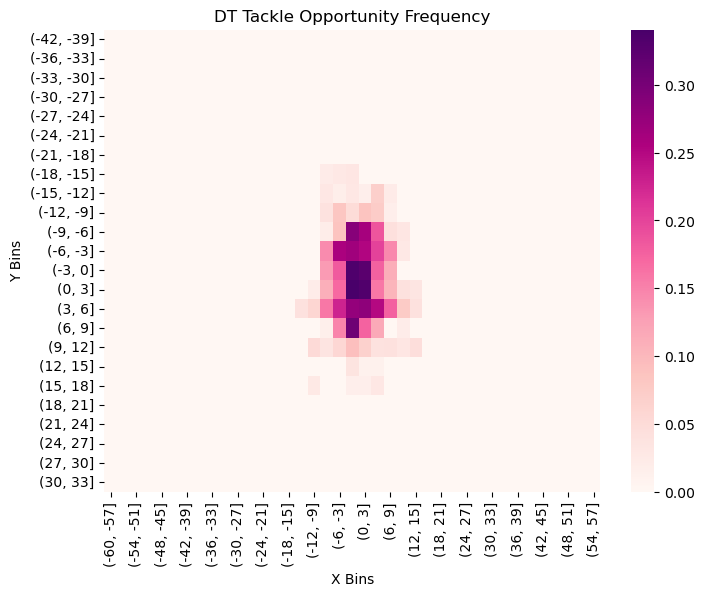

<Figure size 640x480 with 0 Axes>

In [273]:
# make a heatmap of stopage frequency
dt_tackle_opportunity = tackle_opportunity_rate[tackle_opportunity_rate['position']=='DT']

pivot_df = dt_tackle_opportunity.pivot_table(values='tackle_opportunity', index='dif_y_start_closest_bins',
                                           columns='dif_x_start_closest_bins', aggfunc='mean')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('DT Tackle Opportunity Frequency')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()
plt.savefig('DT_tackle_freq.png')

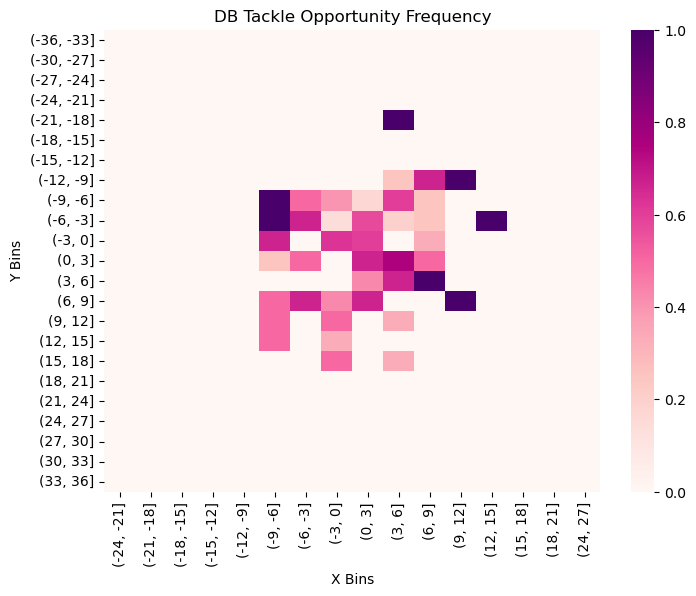

In [166]:
# make a heatmap of stopage frequency
db_tackle_opportunity = tackle_opportunity_rate[tackle_opportunity_rate['position']=='DB']

pivot_df = db_tackle_opportunity.pivot_table(values='tackle_opportunity', index='dif_y_start_closest_bins',
                                           columns='dif_x_start_closest_bins', aggfunc='mean')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('DB Tackle Opportunity Frequency')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()

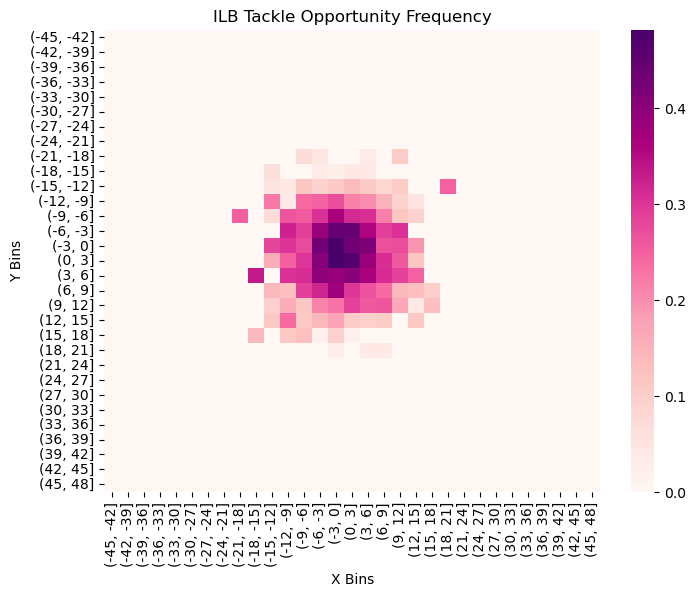

In [167]:
# make a heatmap of stopage frequency
ilb_tackle_opportunity = tackle_opportunity_rate[tackle_opportunity_rate['position']=='ILB']

pivot_df = ilb_tackle_opportunity.pivot_table(values='tackle_opportunity', index='dif_y_start_closest_bins',
                                           columns='dif_x_start_closest_bins', aggfunc='mean')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('ILB Tackle Opportunity Frequency')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()

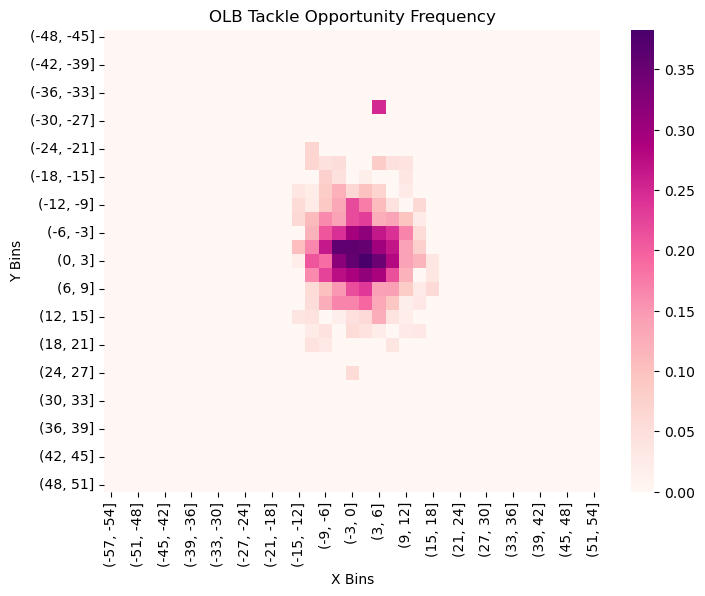

In [168]:
# make a heatmap of stopage frequency
olb_tackle_opportunity = tackle_opportunity_rate[tackle_opportunity_rate['position']=='OLB']

pivot_df = olb_tackle_opportunity.pivot_table(values='tackle_opportunity', index='dif_y_start_closest_bins',
                                           columns='dif_x_start_closest_bins', aggfunc='mean')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('OLB Tackle Opportunity Frequency')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()

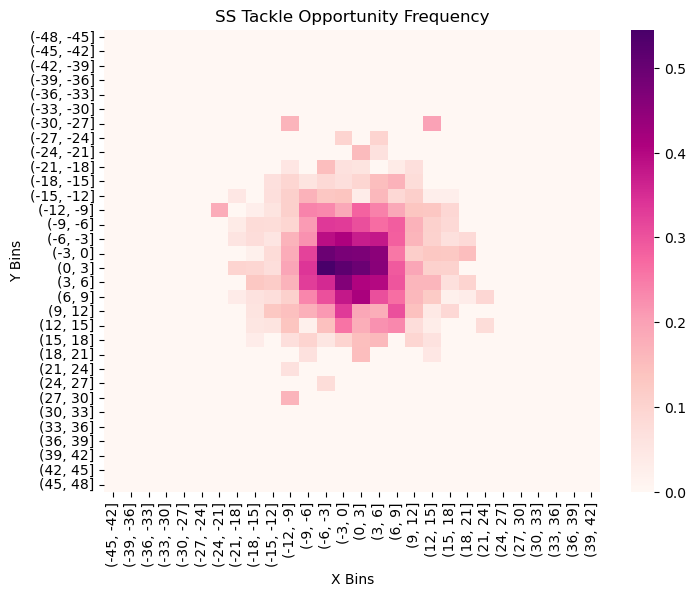

<Figure size 640x480 with 0 Axes>

In [274]:
# make a heatmap of stopage frequency
ss_tackle_opportunity = tackle_opportunity_rate[tackle_opportunity_rate['position']=='SS']

pivot_df = ss_tackle_opportunity.pivot_table(values='tackle_opportunity', index='dif_y_start_closest_bins',
                                           columns='dif_x_start_closest_bins', aggfunc='mean')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('SS Tackle Opportunity Frequency')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()
plt.savefig('SS_tackle_freq.png')

In [118]:
tackle_opportunity_rate = tackle_opportunity_rate.add_prefix('position_')

### For each position, calculate tackle opportunity creation rate per play

In [122]:
position_total_dict = {}
position_rate_df_dict = {}

for pos in set(tackle_opportunity_rate['position_position']):
    pos_tackle_opportunity_rate = tackle_opportunity_rate[tackle_opportunity_rate['position_position']==pos]
    pos_tackle_opportunity_rate = pos_tackle_opportunity_rate.dropna(axis = 0)
    pos_tackle_opportunity_rate = pos_tackle_opportunity_rate[pos_tackle_opportunity_rate['position_num_plays'] > 5]
    position_rate_df_dict [pos] = pos_tackle_opportunity_rate
    position_total_dict[pos] = sum(pos_tackle_opportunity_rate['position_tackle_opportunity'])

In [123]:
position_total_dict

{'RB': 0,
 'FB': 0,
 'DB': 3.698593073593073,
 'NT': 8.024188011325334,
 'OLB': 14.7109225774257,
 'DT': 8.37549753440085,
 'WR': 0,
 'ILB': 23.656563669009227,
 'SS': 27.890199630362606,
 'DE': 8.592799343626346,
 'MLB': 15.404567167996706,
 'FS': 26.823868072503007,
 'CB': 14.318531898349384}

**For each player at each position with more than 30 plays, we'll calculate the seperation from position averages**

In [124]:
start_time = time.time()
pos = 'SS'

# get a df of only that position
pos_def_play_info = def_play_info_pos[def_play_info_pos['position']==pos]

len(set(pos_def_play_info['start_displayName']))

64

In [125]:
defensive_positions = ['OLB', 'CB', 'ILB','MLB', 'SS', 'NT', 'DT', 'DE', 'FS', 'DB']

In [128]:
#calulcate for all positions
player_tackle_opp_rate_dict = {}

for pos in defensive_positions:
    
    start_time = time.time()
    print(pos)

    # get a df of only that position
    pos_def_play_info = def_play_info_pos[def_play_info_pos['position']==pos]

    # group by player and ranges
    player_tackle_opportunity_rate = pos_def_play_info.groupby(by = ['nflId','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).mean(numeric_only = True).reset_index()

    # just take necessary columns and drop any NA rows
    player_tackle_opportunity_rate = player_tackle_opportunity_rate[['nflId','dif_x_start_closest_bins','dif_y_start_closest_bins','tackle_opportunity']]
    player_tackle_opportunity_rate.dropna(axis = 0, inplace = True)

    # group by bins and nflId again to get how many opportunities
    player_tackle_chances = def_play_info_pos.groupby(by = ['nflId','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).count().reset_index()
    player_tackle_chances = player_tackle_chances[['nflId','dif_x_start_closest_bins','dif_y_start_closest_bins', 'playId']]
    player_tackle_chances['num_plays'] = player_tackle_chances['playId']
    player_tackle_chances = player_tackle_chances.drop(columns = ['playId'])

    # drop any NA values and segments with fewer than 5 chances
    player_tackle_chances = player_tackle_chances.dropna(axis = 0)
    player_tackle_chances = player_tackle_chances[player_tackle_chances['num_plays'] > 5]

    # merge together to get all info
    player_tackle_opportunity_rate_all = player_tackle_opportunity_rate.merge(player_tackle_chances, on = ['nflId','dif_x_start_closest_bins', 'dif_y_start_closest_bins'])

    player_tackle_opp_rate_dict[pos] = player_tackle_opportunity_rate_all
    
    end_time = time.time()
    print(end_time - start_time)

OLB
1.3634169101715088
CB
1.1565947532653809
ILB
0.9140770435333252
MLB
0.8340988159179688
SS
0.9082121849060059
NT
0.8511378765106201
DT
0.9586319923400879
DE
0.9662439823150635
FS
0.8774421215057373
DB
0.8518810272216797


In [129]:
# build a dictionary with all players total differencial
total_player_dif_dict = {}
# build a df with all players
all_player_tackle_opp = pd.DataFrame()

for pos in defensive_positions:
    #for pos in player_tackle_opp_rate_dict.keys():
    df = player_tackle_opp_rate_dict[pos]
    df['position'] = pos
    df = df.add_prefix('player_')
    # add the position mean
    player_and_position = df.merge(tackle_opportunity_rate, left_on = ['player_position','player_dif_x_start_closest_bins','player_dif_y_start_closest_bins'],
                                    right_on = ['position_position','position_dif_x_start_closest_bins','position_dif_y_start_closest_bins'])
    # get the player difference vs. position average
    player_and_position['player_vs_league'] = player_and_position['player_tackle_opportunity'] - player_and_position['position_tackle_opportunity']
    # get total player differential
    for player in set(player_and_position['player_nflId']):
        total_player_dif_dict[player] = sum(player_and_position[player_and_position['player_nflId'] == player]['player_vs_league'])

    all_player_tackle_opp = pd.concat([all_player_tackle_opp, player_and_position])

In [130]:
all_player_tackle_opp

,player_nflId,player_dif_x_start_closest_bins,player_dif_y_start_closest_bins,player_tackle_opportunity,player_num_plays,player_position,position_position,position_dif_x_start_closest_bins,position_dif_y_start_closest_bins,position_tackle_opportunity,position_num_plays,player_vs_league
0,35493.0,"(-3, 0]","(-5, -2]",0.166667,6,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,-0.160377
1,37075.0,"(-3, 0]","(-5, -2]",0.285714,7,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,-0.041330
2,37087.0,"(-3, 0]","(-5, -2]",0.375000,8,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,0.047956
3,38548.0,"(-3, 0]","(-5, -2]",0.333333,6,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,0.006289
4,41231.0,"(-3, 0]","(-5, -2]",0.300000,10,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,-0.027044
...,...,...,...,...,...,...,...,...,...,...,...,...
3,52416.0,"(0, 3]","(-8, -5]",0.333333,6,DB,DB,"(0, 3]","(-8, -5]",0.333333,6,0.000000
4,52416.0,"(0, 3]","(-5, -2]",0.571429,7,DB,DB,"(0, 3]","(-5, -2]",0.571429,7,0.000000
5,52416.0,"(0, 3]","(-2, 1]",0.714286,7,DB,DB,"(0, 3]","(-2, 1]",0.714286,7,0.000000
6,52416.0,"(0, 3]","(4, 7]",0.666667,6,DB,DB,"(0, 3]","(4, 7]",0.666667,6,0.000000


In [131]:
# make a dataframe of players' opportunity created above league average
nflIds = []
total_difs = []

for key, value in total_player_dif_dict.items():
    nflIds.append(key)
    total_difs.append(value)
    
total_dif_dict = {}
total_dif_dict['nflId'] = nflIds
total_dif_dict['player_opp_above_league'] = total_difs

player_opp_values = pd.DataFrame(total_dif_dict)

In [132]:
# merge player information
player_opp_values_info = player_opp_values.merge(players, on = 'nflId')
player_opp_values_info = player_opp_values_info.sort_values(by = 'player_opp_above_league', ascending = False)

In [261]:
player_opp_values_info[player_opp_values_info['displayName']=='Sam Hubbard']

,nflId,player_opp_above_league,height,weight,birthDate,collegeName,position,displayName
425,46146.0,1.3737,6-5,265,1995-06-29,Ohio State,DE,Sam Hubbard


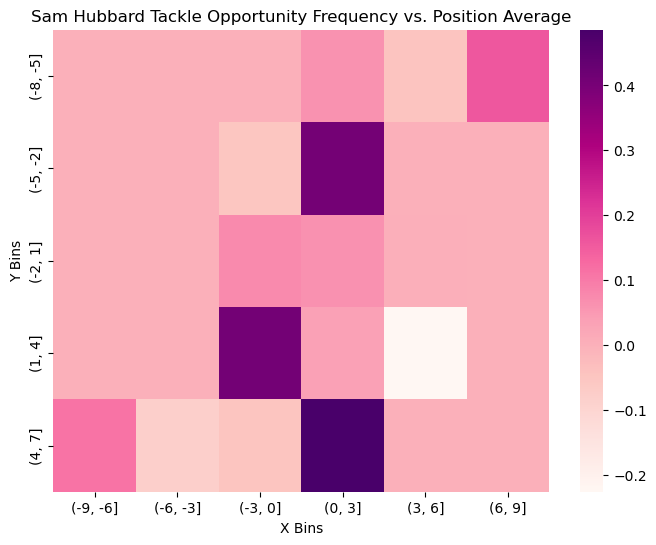

<Figure size 640x480 with 0 Axes>

In [264]:
df = all_player_tackle_opp.copy()

#ilb_tackle_opportunity = tackle_opportunity_rate[tackle_opportunity_rate['position']=='ILB']

# make heat map for Roger McCreary
zf_tackle_opportunity = df[df['player_nflId'] == 46146.0]

pivot_df = zf_tackle_opportunity.pivot_table(values='player_vs_league', index='player_dif_y_start_closest_bins',
                                           columns='player_dif_x_start_closest_bins', aggfunc='mean')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('Sam Hubbard Tackle Opportunity Frequency vs. Position Average')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()
plt.savefig('sam_opportunity.png')

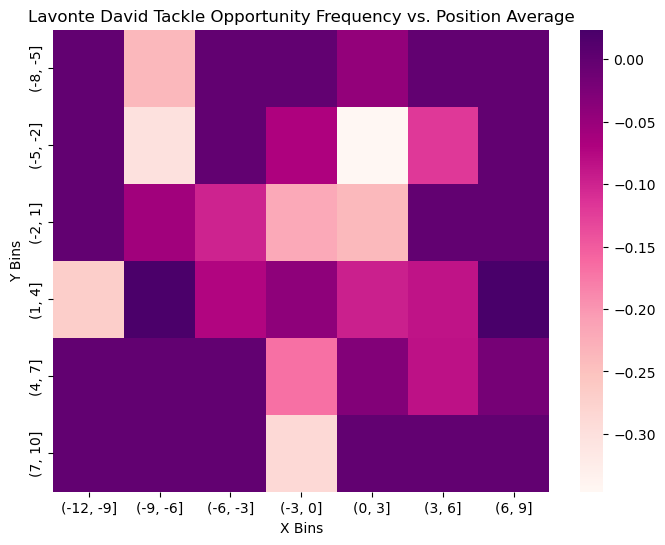

In [135]:
df = all_player_tackle_opp.copy()

#ilb_tackle_opportunity = tackle_opportunity_rate[tackle_opportunity_rate['position']=='ILB']

# make heat map for Zaire Franklin
zf_tackle_opportunity = df[df['player_nflId'] == 38588.0]

pivot_df = zf_tackle_opportunity.pivot_table(values='player_vs_league', index='player_dif_y_start_closest_bins',
                                           columns='player_dif_x_start_closest_bins', aggfunc='mean')
pivot_df = pivot_df.fillna(0)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=False, cmap='RdPu', fmt='g')
plt.title('Lavonte David Tackle Opportunity Frequency vs. Position Average')
plt.xlabel('X Bins')
plt.ylabel('Y Bins')
plt.show()

In [136]:
all_player_tackle_opp

,player_nflId,player_dif_x_start_closest_bins,player_dif_y_start_closest_bins,player_tackle_opportunity,player_num_plays,player_position,position_position,position_dif_x_start_closest_bins,position_dif_y_start_closest_bins,position_tackle_opportunity,position_num_plays,player_vs_league
0,35493.0,"(-3, 0]","(-5, -2]",0.166667,6,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,-0.160377
1,37075.0,"(-3, 0]","(-5, -2]",0.285714,7,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,-0.041330
2,37087.0,"(-3, 0]","(-5, -2]",0.375000,8,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,0.047956
3,38548.0,"(-3, 0]","(-5, -2]",0.333333,6,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,0.006289
4,41231.0,"(-3, 0]","(-5, -2]",0.300000,10,OLB,OLB,"(-3, 0]","(-5, -2]",0.327044,636,-0.027044
...,...,...,...,...,...,...,...,...,...,...,...,...
3,52416.0,"(0, 3]","(-8, -5]",0.333333,6,DB,DB,"(0, 3]","(-8, -5]",0.333333,6,0.000000
4,52416.0,"(0, 3]","(-5, -2]",0.571429,7,DB,DB,"(0, 3]","(-5, -2]",0.571429,7,0.000000
5,52416.0,"(0, 3]","(-2, 1]",0.714286,7,DB,DB,"(0, 3]","(-2, 1]",0.714286,7,0.000000
6,52416.0,"(0, 3]","(4, 7]",0.666667,6,DB,DB,"(0, 3]","(4, 7]",0.666667,6,0.000000


## Stop Opportunities Created and Siezed (SOCS)

Stop creation by

Now, we want to factor in the success of the stops along with the players' ability to get the opportunity

In [137]:
# get the successful stop indicators from our previous df
stop_success = def_player_bc_start_end_frames[['gameId','playId','nflId','successful_stop']]
# merge it with the player by player breakdown
def_play_info_with_stop = def_play_info_pos.merge(stop_success, on = ['gameId','playId','nflId'])

In [138]:
# now, get only the plays with an opportunity to tackle
def_play_info_with_stop = def_play_info_with_stop[def_play_info_with_stop['tackle_opportunity']]

In [139]:
# group by same bins as before for each player
def_play_info_with_stop

,start_gameId,start_playId,start_nflId,start_displayName,start_frameId,start_time,start_jerseyNumber,start_club,start_playDirection,start_x,...,tackle_opportunity,dif_x_start_closest_bins,dif_y_start_closest_bins,height,weight,birthDate,collegeName,position,displayName,successful_stop
1,2022103009,1045,44829.0,Jonathan Allen,1,2022-10-30 17:08:39.200000,93.0,WAS,right,50.59,...,True,"(0, 3]","(-2, 1]",6-3,300,1995-01-16,Alabama,DT,Jonathan Allen,False
3,2022101300,1219,44829.0,Jonathan Allen,1,2022-10-13 21:04:19.000000,93.0,WAS,right,62.66,...,True,"(-3, 0]","(-2, 1]",6-3,300,1995-01-16,Alabama,DT,Jonathan Allen,True
4,2022102306,2275,44829.0,Jonathan Allen,1,2022-10-23 14:47:43.599999,93.0,WAS,left,108.65,...,True,"(0, 3]","(-2, 1]",6-3,300,1995-01-16,Alabama,DT,Jonathan Allen,False
5,2022101300,526,44829.0,Jonathan Allen,1,2022-10-13 20:33:55.099999,93.0,WAS,left,29.56,...,True,"(-3, 0]","(-2, 1]",6-3,300,1995-01-16,Alabama,DT,Jonathan Allen,True
7,2022103009,780,44829.0,Jonathan Allen,1,2022-10-30 16:55:26.299999,93.0,WAS,right,80.31,...,True,"(-3, 0]","(-2, 1]",6-3,300,1995-01-16,Alabama,DT,Jonathan Allen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26541,2022100210,3022,53615.0,Hamsah Nasirildeen,1,2022-10-02 15:23:56.799999,45.0,NYJ,left,45.81,...,True,"(3, 6]","(7, 10]",6-4,215,NaN,Florida State,ILB,Hamsah Nasirildeen,True
26542,2022091200,1217,53315.0,Aaron Patrick,1,2022-09-12 21:04:01.099999,94.0,DEN,left,44.90,...,True,"(0, 3]","(-14, -11]",6-4,245,NaN,Eastern Kentucky,OLB,Aaron Patrick,True
26543,2022100912,1570,54718.0,Russ Yeast,1,2022-10-09 17:35:03.700000,21.0,LA,left,63.13,...,True,"(24, 27]","(-5, -2]",5-10,195,NaN,Kansas State,FS,Russ Yeast,True
26544,2022091901,3002,54497.0,Lewis Cine,1,2022-09-19 22:39:58.500000,6.0,MIN,right,62.96,...,True,"(-9, -6]","(25, 28]",6-1,200,NaN,Georgia,FS,Lewis Cine,True


In [143]:
#calulcate for all players
player_tackle_stop_rate_dict = {}

for pos in defensive_positions:
    
    start_time = time.time()
    print(pos)

    # get a df of only that position
    pos_def_play_info = def_play_info_with_stop[def_play_info_with_stop['position']==pos]

    # group by player and ranges
    player_tackle_opportunity_rate = pos_def_play_info.groupby(by = ['nflId','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).mean(numeric_only = True).reset_index()

    # just take necessary columns and drop any NA rows
    player_tackle_opportunity_rate = player_tackle_opportunity_rate[['nflId','dif_x_start_closest_bins','dif_y_start_closest_bins','successful_stop']]
    player_tackle_opportunity_rate.dropna(axis = 0, inplace = True)

    # group by bins and nflId again to get how many opportunities
    player_tackle_chances = def_play_info_pos.groupby(by = ['nflId','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).count().reset_index()
    player_tackle_chances = player_tackle_chances[['nflId','dif_x_start_closest_bins','dif_y_start_closest_bins', 'playId']]
    player_tackle_chances['num_opportunities'] = player_tackle_chances['playId']
    player_tackle_chances = player_tackle_chances.drop(columns = ['playId'])

    # drop any NA values and segments with fewer than 5 chances
    player_tackle_chances = player_tackle_chances.dropna(axis = 0)
    player_tackle_chances = player_tackle_chances[player_tackle_chances['num_opportunities'] > 5]

    # merge together to get all info
    player_tackle_opportunity_rate_all = player_tackle_opportunity_rate.merge(player_tackle_chances, on = ['nflId','dif_x_start_closest_bins', 'dif_y_start_closest_bins'])

    player_tackle_stop_rate_dict[pos] = player_tackle_opportunity_rate_all
    
    end_time = time.time()
    print(end_time - start_time)

OLB
1.0065929889678955
CB
1.0920188426971436
ILB
0.9103472232818604
MLB
0.8288090229034424
SS
0.8589801788330078
NT
0.8182239532470703
DT
0.9072792530059814
DE
0.8916740417480469
FS
0.8528637886047363
DB
0.8000788688659668


In [145]:
# combine all positions
all_def_players_success = pd.DataFrame()
for pos in defensive_positions:
    all_def_players_success = pd.concat([all_def_players_success, player_tackle_stop_rate_dict[pos]])

# add a prefix for the df 
all_def_players_success = all_def_players_success.add_prefix("player_")

In [146]:
# combine with the opportunity rate
all_player_stops = all_player_tackle_opp.merge(all_def_players_success, 
                                               on = ['player_nflId','player_dif_x_start_closest_bins','player_dif_y_start_closest_bins'],)

### Get positional averages for stop rate

In [148]:
start_time = time.time()
# group by bins and position to get means
pos_tackle_stop_rate = def_play_info_with_stop.groupby(by = ['position','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).mean(numeric_only = True).reset_index()

# just take necessary columns
pos_tackle_stop_rate = pos_tackle_stop_rate[['position','dif_x_start_closest_bins','dif_y_start_closest_bins','successful_stop']]

# group by bins and position again to get how many opportunities
tackle_opps = def_play_info_with_stop.groupby(by = ['position','dif_x_start_closest_bins', 'dif_y_start_closest_bins']).count().reset_index()
tackle_opps = tackle_opps[['position','dif_x_start_closest_bins','dif_y_start_closest_bins', 'playId']]
tackle_opps['num_opportunties'] = tackle_opps['playId']
tackle_opps = tackle_opps.drop(columns = ['playId'])

# merge together to get all info
pos_tackle_stop_rate = pos_tackle_stop_rate.merge(tackle_opps, on = ['position','dif_x_start_closest_bins', 'dif_y_start_closest_bins'])

# drop the null rows
pos_tackle_stop_rate = pos_tackle_stop_rate.dropna(axis = 0)

# take only regions with more than 5 opportunities 
pos_tackle_stop_rate = pos_tackle_stop_rate[pos_tackle_stop_rate['num_opportunties'] >= 5]
pos_tackle_stop_rate = pos_tackle_stop_rate.add_prefix('position_').reset_index(drop = True)

end_time = time.time()
print(end_time - start_time)

0.07444596290588379


In [149]:
pos_tackle_stop_rate

,position_position,position_dif_x_start_closest_bins,position_dif_y_start_closest_bins,position_successful_stop,position_num_opportunties
0,CB,"(-12, -9]","(-8, -5]",0.500000,12
1,CB,"(-12, -9]","(-5, -2]",0.500000,12
2,CB,"(-12, -9]","(-2, 1]",0.750000,8
3,CB,"(-12, -9]","(1, 4]",0.846154,13
4,CB,"(-12, -9]","(4, 7]",0.714286,14
...,...,...,...,...,...
484,SS,"(12, 15]","(-2, 1]",0.875000,8
485,SS,"(12, 15]","(1, 4]",0.666667,6
486,SS,"(12, 15]","(4, 7]",0.636364,11
487,SS,"(12, 15]","(7, 10]",0.666667,6


### Combine player and position information

*stat formula*: Sum over all areas((stop rate * stop opportunities) - (position avg stop rate * position avg stop opportunities))

In [150]:
# add in the position stop rate df
all_player_stops_total = all_player_stops.merge(pos_tackle_stop_rate, 
                                                on = ['position_position','position_dif_x_start_closest_bins','position_dif_y_start_closest_bins'])

In [151]:
# calculate the stat per area 
all_player_stops_total['area_stat'] = (all_player_stops_total['player_successful_stop'] * 
                                       all_player_stops_total['player_tackle_opportunity']) - (all_player_stops_total['position_successful_stop'] *
                                                                                               all_player_stops_total['position_tackle_opportunity'])

In [152]:
# get player total opportunities
player_plays_sum = all_player_stops_total[['player_nflId','player_num_plays']].groupby(by = 'player_nflId').sum().reset_index()
player_plays_sum['player_total_plays'] = player_plays_sum['player_num_plays']
player_plays_sum = player_plays_sum.drop(columns = ['player_num_plays'])

# add this to the full data
all_player_info_by_area = all_player_stops_total.merge(player_plays_sum, on  = 'player_nflId')

In [153]:
# calculate area weight
all_player_info_by_area['area_weight'] = all_player_info_by_area['player_num_plays'] / all_player_info_by_area['player_total_plays']

# multiply weight by stat
all_player_info_by_area['weighted_area_stat'] = all_player_info_by_area['area_stat'] * all_player_info_by_area['area_weight']

In [155]:
# group by player to calculate total stat
total_stat_calc = all_player_info_by_area.groupby(by = 'player_nflId').sum(numeric_only=True).reset_index()

# get only the necessary columns
total_stat_calc = total_stat_calc[['player_nflId','player_num_plays','weighted_area_stat', 'area_stat']]

# rename from grouping
total_stat_calc['weighted_total_stat'] = total_stat_calc['weighted_area_stat']
total_stat_calc['unweighted_total_stat'] = total_stat_calc['area_stat']

total_stat_calc = total_stat_calc.drop(columns = ['weighted_area_stat', 'area_stat'])

# add player information
total_stat_calc = total_stat_calc.merge(players, left_on = 'player_nflId', right_on = 'nflId')

# filter out players with fewer than 50 plays
total_stat_calc = total_stat_calc[total_stat_calc['player_num_plays'] >= 20]

# sort by stat
total_stat_calc = total_stat_calc.sort_values(by = 'unweighted_total_stat', ascending = False)

In [156]:
# get the top 10 of each position
for pos in defensive_positions:
    df = total_stat_calc[total_stat_calc['position'] == pos]
    print('\n')
    print(pos)
    print(df[['displayName', 'unweighted_total_stat']].head(10))



OLB
         displayName  unweighted_total_stat
265   Zaire Franklin               2.468652
204  Nicholas Morrow               1.987040
309   Germaine Pratt               1.710246
453    Divine Deablo               1.526866
430      Jamin Davis               1.475058
87    Kwon Alexander               1.281524
44      Anthony Barr               1.115603
445      Pete Werner               1.115556
387    Terrell Lewis               1.055899
317  Quincy Williams               0.933107


CB
           displayName  unweighted_total_stat
499     Roger McCreary               1.607491
403     L'Jarius Sneed               1.558843
390   Cameron Dantzler               1.193767
471         Nate Hobbs               1.137620
228      Carlton Davis               0.990379
536        Kader Kohou               0.803023
192       Desmond King               0.708799
250      Avonte Maddox               0.592790
473  Deommodore Lenoir               0.583862
125     Kendall Fuller               0.580521

In [247]:
def normalize_statistic(data):

    pos_mean = data.mean()
    pos_std = data.std()
    
    return (data - pos_mean) / pos_std


In [248]:
full_socs = pd.DataFrame()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


for pos in defensive_positions:
    df = total_stat_calc[total_stat_calc['position'] == pos]
    df['normalized_socs'] = normalize_statistic(df['unweighted_total_stat'])
    full_socs = pd.concat([full_socs, df])

/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/798087870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_socs'] = normalize_statistic(df['unweighted_total_stat'])
/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/798087870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_socs'] = normalize_statistic(df['unweighted_total_stat'])
/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/798087870.py:8: SettingWithCopyWarning: 
A valu

In [254]:
full_socs = full_socs.sort_values(by = 'normalized_socs', ascending = False)
full_socs.to_csv('SOCS_leaders.csv')

# get the top 10 of each position
for pos in defensive_positions:
    df = full_socs[full_socs['position'] == pos]
    df['SOCS'] = df['normalized_socs']
    df['Player Name'] = df['displayName']
    print('\n')
    print(pos)
    print(df[['Player Name', 'SOCS']].head(10))
    df.to_csv(pos + '_socs_leaders.csv')



OLB
         Player Name      SOCS
265   Zaire Franklin  3.373558
204  Nicholas Morrow  2.667635
309   Germaine Pratt  2.261926
453    Divine Deablo  1.993137
430      Jamin Davis  1.917199
87    Kwon Alexander  1.633527
44      Anthony Barr  1.390329
445      Pete Werner  1.390260
387    Terrell Lewis  1.302819
317  Quincy Williams  1.122836


CB
           Player Name      SOCS
499     Roger McCreary  3.078395
403     L'Jarius Sneed  2.982237
390   Cameron Dantzler  2.260623
471         Nate Hobbs  2.149643
228      Carlton Davis  1.858605
536        Kader Kohou  1.488274
192       Desmond King  1.302031
250      Avonte Maddox  1.072725
473  Deommodore Lenoir  1.055078
125     Kendall Fuller  1.048474


ILB
          Player Name      SOCS
219     Rashaan Evans  2.510674
46        C.J. Mosley  2.138238
381      Logan Wilson  1.260108
215  Tremaine Edmunds  1.219594
324    Drue Tranquill  1.211293
73     Eric Kendricks  1.210516
456      Ernest Jones  1.144218
493       Quay Walker  

/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/1373812941.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOCS'] = df['normalized_socs']
/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/1373812941.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Player Name'] = df['displayName']
/var/folders/bg/hyfz4snj4hz8rkdrzj4xgjjw0000gn/T/ipykernel_18644/1373812941.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [177]:
#total_stat_calc.sort_values(by = '')
df = all_player_info_by_area.groupby(by = 'player_nflId').sum(numeric_only=True).reset_index().sort_values(by = 'player_successful_stop', ascending = False)

In [181]:
df.merge(players, left_on = 'player_nflId',right_on = 'nflId')

,player_nflId,player_tackle_opportunity,player_num_plays,position_tackle_opportunity,position_num_plays,player_vs_league,player_successful_stop,player_num_opportunities,position_successful_stop,position_num_opportunties,...,player_total_plays,area_weight,weighted_area_stat,nflId,height,weight,birthDate,collegeName,position,displayName
0,46091.0,9.582521,236,8.426220,8134,1.156301,18.483261,236,15.829628,3045,...,5192,1.0,0.106113,46091,6-2,234,1995-11-08,Alabama,ILB,Rashaan Evans
1,46077.0,11.751586,260,10.326424,9546,1.425162,18.228571,260,20.309278,3474,...,7280,1.0,-0.018107,46077,6-0,230,1997-04-08,Georgia,ILB,Roquan Smith
2,45345.0,8.635248,229,6.239964,8804,2.395285,16.883333,229,16.047856,2448,...,5267,1.0,0.078906,45345,6-0,225,1995-07-10,Greenville,OLB,Nicholas Morrow
3,46304.0,8.796184,233,5.587017,8654,3.209167,15.884127,233,15.931914,2321,...,5126,1.0,0.092851,46304,6-0,236,1996-07-02,Syracuse,OLB,Zaire Franklin
4,41243.0,10.161925,210,7.982929,7930,2.178995,15.869805,210,15.166695,2966,...,4410,1.0,0.083165,41243,6-2,250,1992-06-19,Alabama,ILB,C.J. Mosley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,47942.0,0.333333,6,0.220690,435,0.112644,0.000000,6,0.750000,88,...,6,1.0,-0.165517,47942,6-3,300,1996-05-20,Maryland,DT,Byron Cowart
537,46156.0,0.452381,13,0.706354,1409,-0.253973,0.000000,13,1.317229,449,...,26,1.0,-0.231223,46156,6-5,240,1996-05-03,Louisiana State,OLB,Arden Key
538,46902.0,0.803571,15,0.929845,1555,-0.126274,0.000000,15,1.384265,667,...,30,1.0,-0.320848,46902,6-1,229,1995-12-14,Western Michigan,ILB,Robert Spillane
539,43354.0,0.571429,14,0.652657,1370,-0.081229,0.000000,14,1.309812,409,...,28,1.0,-0.213734,43354,6-7,275,1993-04-12,Penn State,OLB,Carl Nassib


## Create Additional Visualizations

In [188]:
#2022100912	1570

# Russ Yeast Play
game = all_tracking[all_tracking['gameId'] == 2022100912]
play = game[game['playId']==1570]

In [199]:
set(play['club'])
play

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1252672,2022100912,1570,38577.0,Bobby Wagner,1,2022-10-09 17:35:03.700000,45.0,LA,left,81.420000,29.23,4.13,3.74,0.40,137.84,179.41,pass_arrived
1252673,2022100912,1570,38577.0,Bobby Wagner,2,2022-10-09 17:35:03.799999,45.0,LA,left,81.430000,28.79,4.53,3.16,0.44,142.23,177.73,NaN
1252674,2022100912,1570,38577.0,Bobby Wagner,3,2022-10-09 17:35:03.900000,45.0,LA,left,81.450000,28.31,4.93,2.96,0.48,145.97,176.96,NaN
1252675,2022100912,1570,38577.0,Bobby Wagner,4,2022-10-09 17:35:04.000000,45.0,LA,left,81.480000,27.80,5.28,2.71,0.51,148.23,177.48,NaN
1252676,2022100912,1570,38577.0,Bobby Wagner,5,2022-10-09 17:35:04.099999,45.0,LA,left,81.490000,27.25,5.59,2.27,0.55,149.94,178.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253794,2022100912,1570,NaN,football,45,2022-10-09 17:35:08.099999,NaN,football,left,76.860001,4.05,2.97,0.89,0.31,NaN,NaN,tackle
1253795,2022100912,1570,NaN,football,46,2022-10-09 17:35:08.200000,NaN,football,left,76.599998,3.91,2.75,2.23,0.30,NaN,NaN,NaN
1253796,2022100912,1570,NaN,football,47,2022-10-09 17:35:08.299999,NaN,football,left,76.370003,3.75,2.58,3.22,0.28,NaN,NaN,NaN
1253797,2022100912,1570,NaN,football,48,2022-10-09 17:35:08.400000,NaN,football,left,76.199997,3.56,2.34,3.08,0.26,NaN,NaN,NaN


In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation

MovieWriter imagemagick unavailable; using Pillow instead.


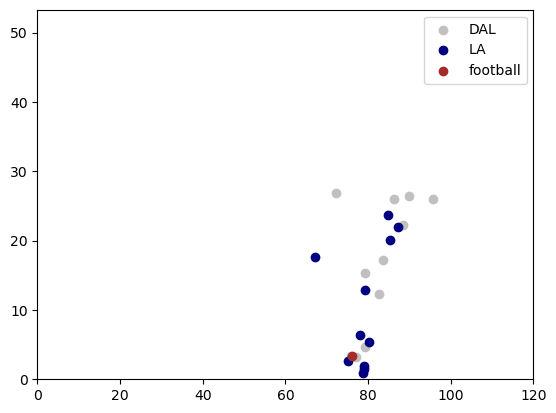

In [208]:
# Assuming your data is stored in a DataFrame called play_tracking_data

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Define the colors for each team
team_colors = {'DAL': 'silver', 'LA': 'navy', 'football': 'brown'}  # Update with your actual team names and colors

# Create a colormap using team colors
cmap = ListedColormap([team_colors['DAL'], team_colors['LA'], team_colors['football']])

# Group data by team for efficient plotting
grouped = play.groupby('club')

# Initialize an empty scatter plot
scatters = {team: ax.scatter([], [], color=team_colors[team], label=team) for team, _ in grouped}

# Set plot limits based on your data
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)

# Function to update the plot for each frame
def update(frame):
    # Get data for the current frame
    frame_data = play[play['frameId'] == frame]
    
    # Update scatter plot data for each team
    for club, group in grouped:
        team_data = frame_data[frame_data['club'] == club]
        scatters[club].set_offsets(team_data[['x', 'y']])
    
    return list(scatters.values())

# Create the animation
frames = play['frameId'].unique()
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Show legend
ax.legend()

# Save the animation as a GIF
ani.save('football_tracking.gif', writer='imagemagick', fps=10)  # Change the file name and adjust fps if needed

# Show the plot
plt.show()

In [205]:
ani

/Users/calvinaberg/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


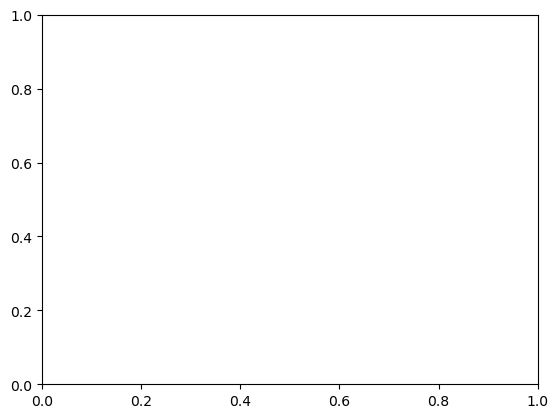

In [211]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Load the data
df = play

# Define the figure and axis
fig, ax = plt.subplots()

# Define the colors for each club
colors = {'DAL': 'silver', 'LA': 'blue', 'football': 'brown'}

# Define the animation function
def animate(i):
    # Filter the data for the current frame
    data = df[df['frameId'] == i]
    # Plot the data
    for club, color in colors.items():
        club_data = data[data['club'] == club]
        ax.scatter(club_data['x'], club_data['y'], color=color)
    # Set the axis limits
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    # Set the title
    ax.set_title(f'Frame {i}')

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=df['frameId'].nunique(), interval=100)

# Show the animation
plt.show()

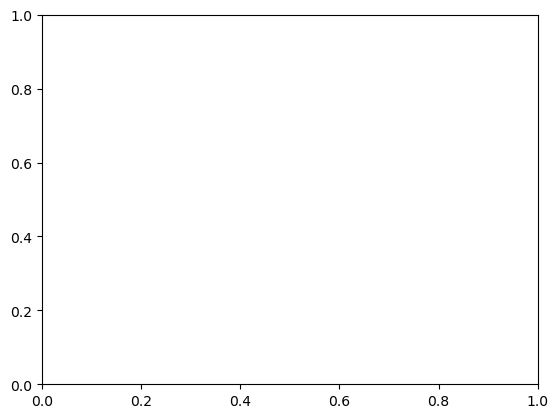

In [216]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Load the data
df = play

# Define the figure and axis
fig, ax = plt.subplots()

# Define the colors for each club
colors = {'DAL': 'silver', 'LA': 'blue', 'football': 'brown'}

# Define the animation function
def animate(i):
    # Filter the data for the current frame
    data = df[df['frameId'] == i]
    # Plot the data
    for club, color in colors.items():
        club_data = data[data['club'] == club]
        ax.scatter(club_data['x'], club_data['y'], color=color)
    # Set the axis limits
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    # Set the title
    ax.set_title(f'Frame {i}')

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=df['frameId'].nunique(), interval=100)

# Assign the animation to a variable
animation_variable = anim

anim.resume()

# Show the animation
plt.show()